Pretrained MobileNet 0
Name doesn't contain MobileNet 1
Name contains MobileNet 2


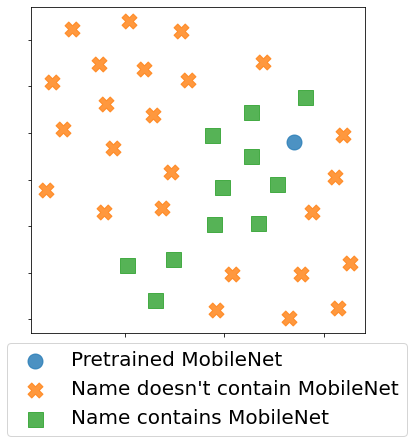

In [4]:
import json
import os
import math

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.ticker import NullFormatter

import numpy as np

ddv_data_dir = "/home/yuancli/projects/ModelDiff/modeldiff_tf/ddv_data/"
file_names = [x for x in os.listdir(path=ddv_data_dir)
              if x.startswith("mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.tflite")]
file_paths = [os.path.join(ddv_data_dir, name) for name in file_names]

ddv_list = []
model_names = []

with open(file_paths[0], "r") as f:
    j = json.load(f)
    ddv_list.append(j["ddv1"])
    model_names.append("source_model")

for file_path in file_paths:
    with open(file_path, "r") as f:
        j = json.load(f)
        if (j["ddv2"][0] == 0.0 and j["ddv2"][-1] == 0.0):
            continue
        ddv_list.append(j["ddv2"])
        model_names.append(j["model2"].split('__assets__')[1].split('.')[0])
        
#print(ddv_list[0])
        
filtered_model_names = []
for name in model_names:
    if name == "source_model":
        filtered_model_names.append("Pretrained MobileNet")
    elif "mobilenet" in name.lower():
        filtered_model_names.append("Name contains MobileNet")
    #elif "resnet_50" in name.lower():
    #    filtered_model_names.append("ResNet50")
    #else:
    #    filtered_model_names.append(name)
    else:
        filtered_model_names.append("Name doesn't contain MobileNet")

filtered_model_name_to_id = {}
id_to_filtered_model_name = {}
filtered_model_ids = []
curr_id = 0
for name in filtered_model_names:
    if name not in filtered_model_name_to_id:
        filtered_model_name_to_id[name] = curr_id
        id_to_filtered_model_name[curr_id] = name
        curr_id += 1
    filtered_model_ids.append(filtered_model_name_to_id[name])

#print(json.dumps(model_names, indent=2))
#print(json.dumps(filtered_model_names, indent=2))
#print(json.dumps(filtered_model_ids, indent=2))

iris = datasets.load_iris()

'''
X = iris.data
y = iris.target
target_names = iris.target_names
'''

X = ddv_list
y = np.array(filtered_model_ids)
target_names = filtered_model_names
# print(X)
method = TSNE(n_components=2)
# method = manifold.MDS(n_components, max_iter=100, n_init=1)
X_r = method.fit_transform(X)

# Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))

plt.rcParams.update({'font.size': 20, 'lines.markersize': 15})
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
# plt.axis('off')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

lw = 2

# print(X_r)

for i in range(curr_id):
    # print(y == i)
    label = id_to_filtered_model_name[i]
    if i == 0:
        marker = 'o'
    elif i == 1:
        marker = 'X'
    else:
        marker = 's'
    print(label, i)
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], # lw=lw,
                label=label, alpha=0.8, marker=marker)

# print(X_r[y == 1])

plt.legend(shadow=False, scatterpoints=1, loc='upper left', bbox_to_anchor=(-0.1, -0.0))

plt.show()

[0. 0. 0. 0. 3. 0. 0. 0. 3. 5.] [-0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8] <BarContainer object of 10 artists>


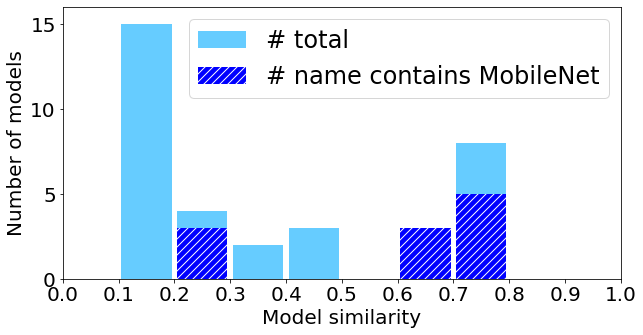

In [87]:
import numpy as np
import matplotlib.pyplot as plt

mbnet_similarities = [
    0.10127492796756521,
    0.10127492796756521,
    0.10127492796756521,
    0.10127492796756521,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.10226025300027553,
    0.2818432306555191,
    0.2818432306555191,
    0.2818432306555191,
    0.29647024372106934,
    0.3511331842836074,
    0.3511331842836074,
    0.4496204023412885,
    0.4496204023412885,
    0.48336281566806294,
    0.6849381836659296,
    0.6849381836659296,
    0.6849381836659296,
    0.7104826167755749,
    0.7165086528229154,
    0.7165086528229154,
    0.7691313120009033,
    0.7691313120009033,
    0.7959926184995123,
    0.7959926184995123,
    0.7959926184995123
]

from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 24, 'hatch.color': 'white'})

ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

n, bins, patches = plt.hist(mbnet_similarities, [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], density=False, facecolor='#66ccff', rwidth=0.9, label="# total")
plt.legend(loc='upper center')

mbnet_ratio = [0.7] * 5 + [0.6] * 3 + [0.2] * 3
n, bins, patches = plt.hist(mbnet_ratio, [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], density=False, facecolor='b', rwidth=0.9, hatch = '///', label="# name contains MobileNet")
plt.legend(loc='best')
print(n, bins, patches)

plt.xticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Model similarity')
plt.ylabel('Number of models')
plt.xlim(0, 1)
plt.ylim(0, 16)
plt.show()
